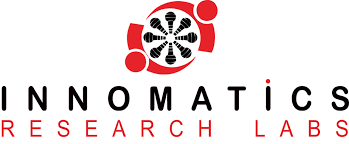

# Task 10

# Exploratory Data Analysis

## Introduction to Dataset

* The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines.
* The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. 
* The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points.
* The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

### Objective
1. To perform Univariate Analysis for:
    * Finding the outliers in each numerical column
    * Understanding the probability and frequency distribution of each numerical column
    * Understanding the frequency distribution of each categorical Variable/Column
2. To perform Bivariate Analysis for:
    * Discovering the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc..
    * Identifying the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..
3. Test the claim: \
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”
4. To find is there a relationship between gender and specialisation?
5. Perform feature transformation

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [4]:
df.shape

(3998, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [6]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [7]:
df["Designation"].value_counts()

software engineer                 539
software developer                265
system engineer                   205
programmer analyst                139
systems engineer                  118
                                 ... 
operational excellence manager      1
ruby on rails developer             1
corporate recruiter                 1
quality control inspector           1
implementation engineer             1
Name: Designation, Length: 419, dtype: int64

In [8]:
df["Gender"].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [9]:
df["GraduationYear"].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
0          1
Name: GraduationYear, dtype: int64

In [10]:
df.drop(labels='ID',axis =1 ,inplace = True)

In [11]:
df['DOJ']=pd.to_datetime(df['DOJ'])

In [12]:
df['DOL'].value_counts()

present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
                       ... 
2008-03-01 00:00:00       1
2011-08-01 00:00:00       1
2005-03-01 00:00:00       1
2010-10-01 00:00:00       1
2009-06-01 00:00:00       1
Name: DOL, Length: 67, dtype: int64

## Univariate Analysis

In [13]:
df.hist(figsize=(300,300))

array([[<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'10percentage'}>,
        <AxesSubplot:title={'center':'12graduation'}>,
        <AxesSubplot:title={'center':'12percentage'}>,
        <AxesSubplot:title={'center':'CollegeID'}>],
       [<AxesSubplot:title={'center':'CollegeTier'}>,
        <AxesSubplot:title={'center':'collegeGPA'}>,
        <AxesSubplot:title={'center':'CollegeCityID'}>,
        <AxesSubplot:title={'center':'CollegeCityTier'}>,
        <AxesSubplot:title={'center':'GraduationYear'}>],
       [<AxesSubplot:title={'center':'English'}>,
        <AxesSubplot:title={'center':'Logical'}>,
        <AxesSubplot:title={'center':'Quant'}>,
        <AxesSubplot:title={'center':'Domain'}>,
        <AxesSubplot:title={'center':'ComputerProgramming'}>],
       [<AxesSubplot:title={'center':'ElectronicsAndSemicon'}>,
        <AxesSubplot:title={'center':'ComputerScience'}>,
        <AxesSubplot:title={'center':'MechanicalEngg'}>,
        <AxesSu

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

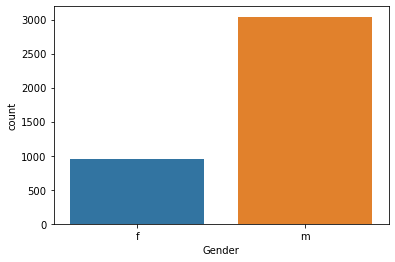

In [14]:
sns.countplot(df['Gender'])

Most of the employees are Male

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

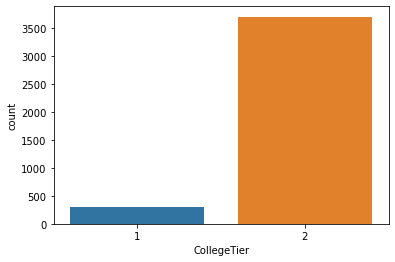

In [15]:
sns.countplot(df["CollegeTier"])

Very few employees from Tier 1 college

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Degree', ylabel='count'>

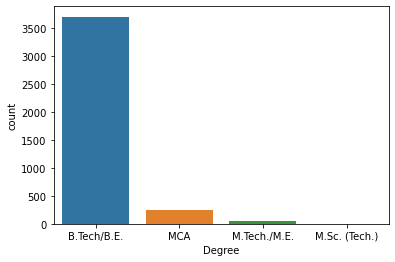

In [16]:
sns.countplot(df["Degree"])

Most of the employees are B.E./B.Tech graduates

<AxesSubplot:>

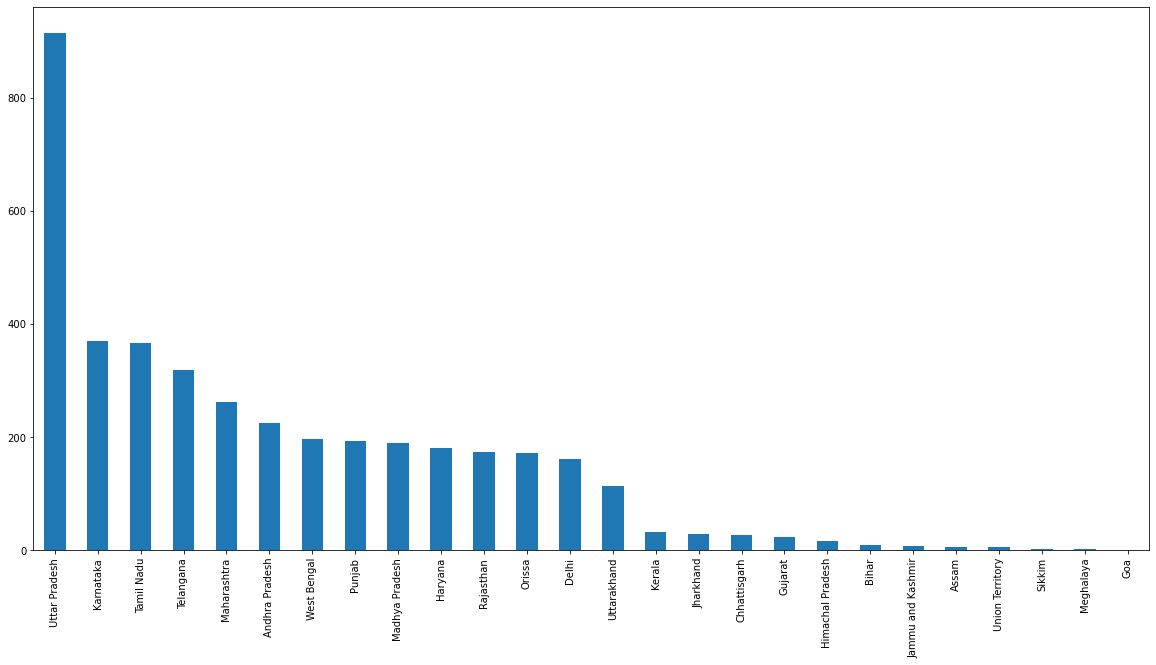

In [17]:
state = df["CollegeState"].value_counts()
state.plot(kind="bar",figsize=(20,10))

More employees from Uttar Pradesh

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

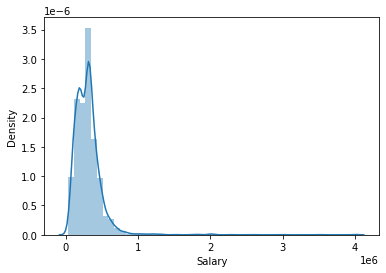

In [18]:
sns.distplot(df["Salary"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='collegeGPA', ylabel='Density'>

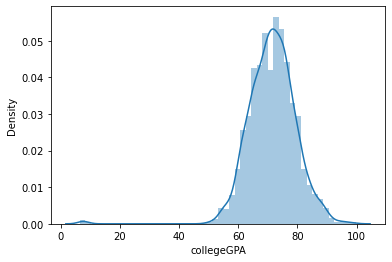

In [19]:
sns.distplot(df.collegeGPA )

<AxesSubplot:>

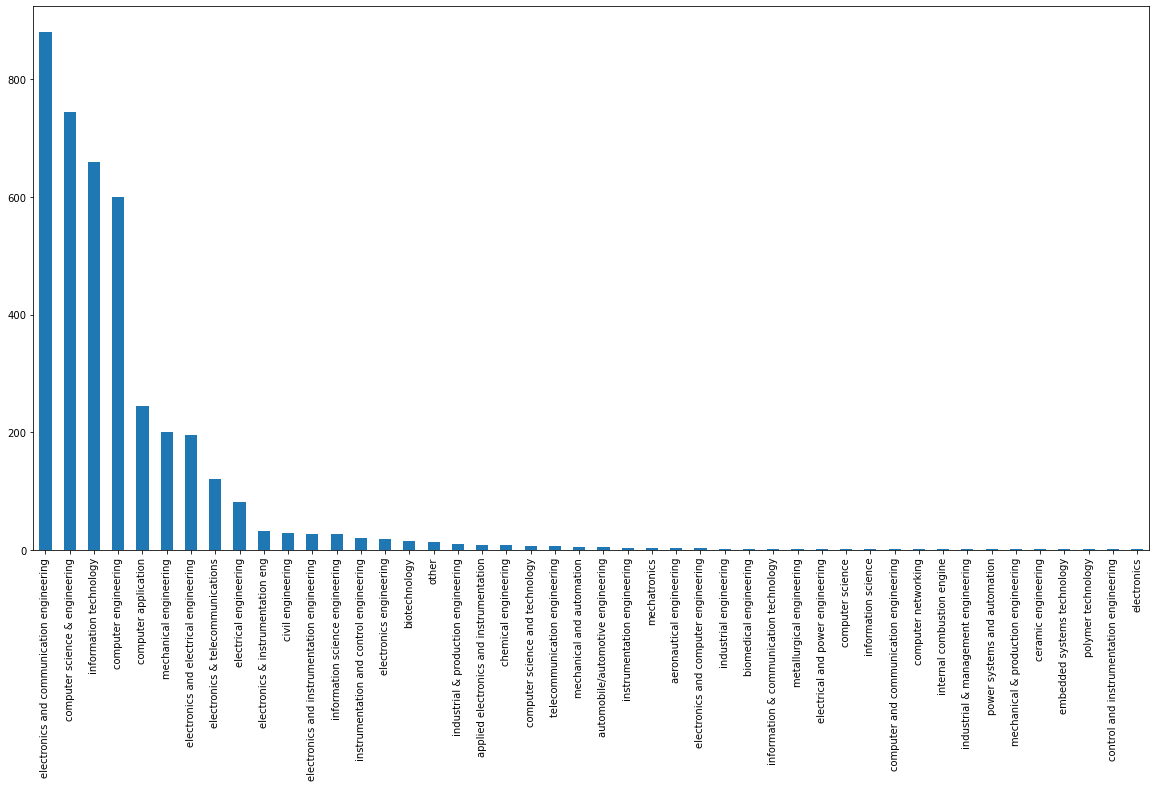

In [20]:
spec = df['Specialization'].value_counts()
spec.plot(kind="bar",figsize=(20,10))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='10percentage', ylabel='Density'>

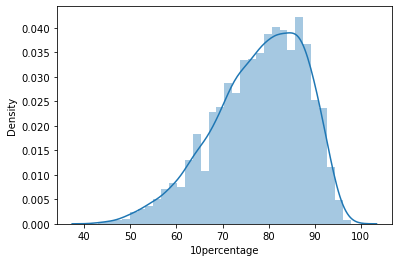

In [21]:
sns.distplot(df["10percentage"])

10percentage column is Right skewed

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='12percentage', ylabel='Density'>

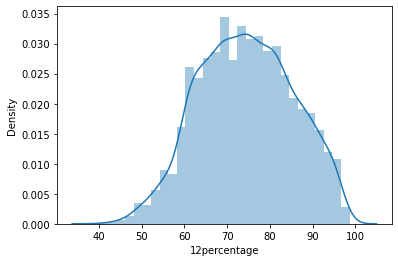

In [22]:
sns.distplot(df["12percentage"])

12percentage is not normally distributed

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

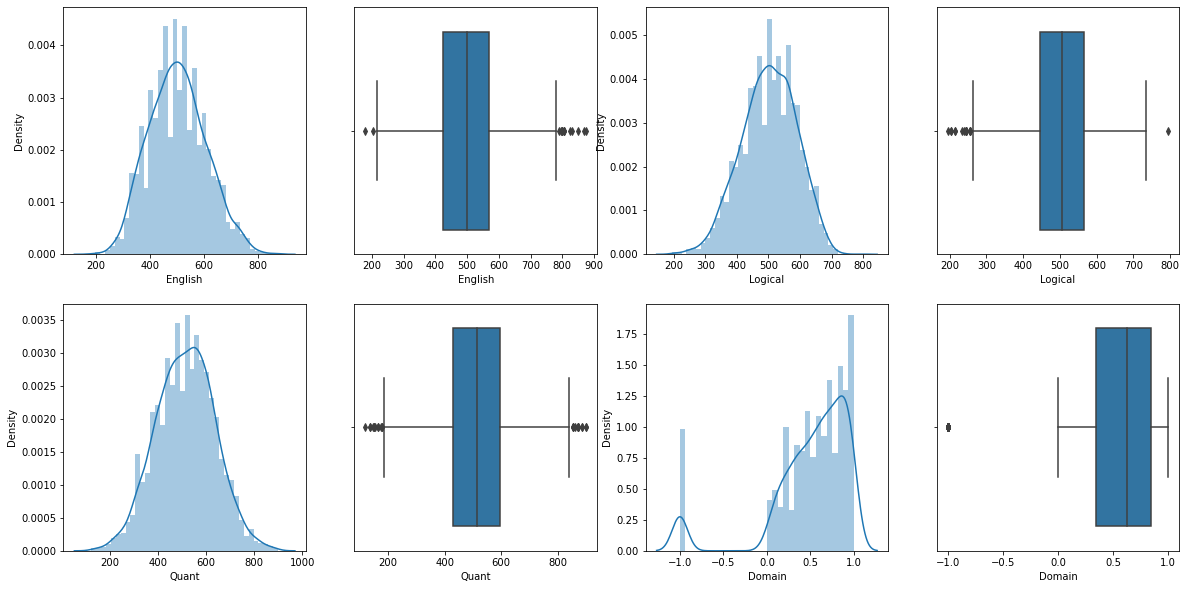

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(241)
sns.distplot(df['English'])
plt.subplot(242)
sns.boxplot(df['English'])
plt.subplot(243)
sns.distplot(df['Logical'])
plt.subplot(244)
sns.boxplot(df['Logical'])
plt.subplot(245)
sns.distplot(df['Quant'])
plt.subplot(246)
sns.boxplot(df['Quant'])
plt.subplot(247)
sns.distplot(df['Domain'])
plt.subplot(248)
sns.boxplot(df['Domain'])
plt.show()

These are the distribution of AMCAT score of soft skills

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

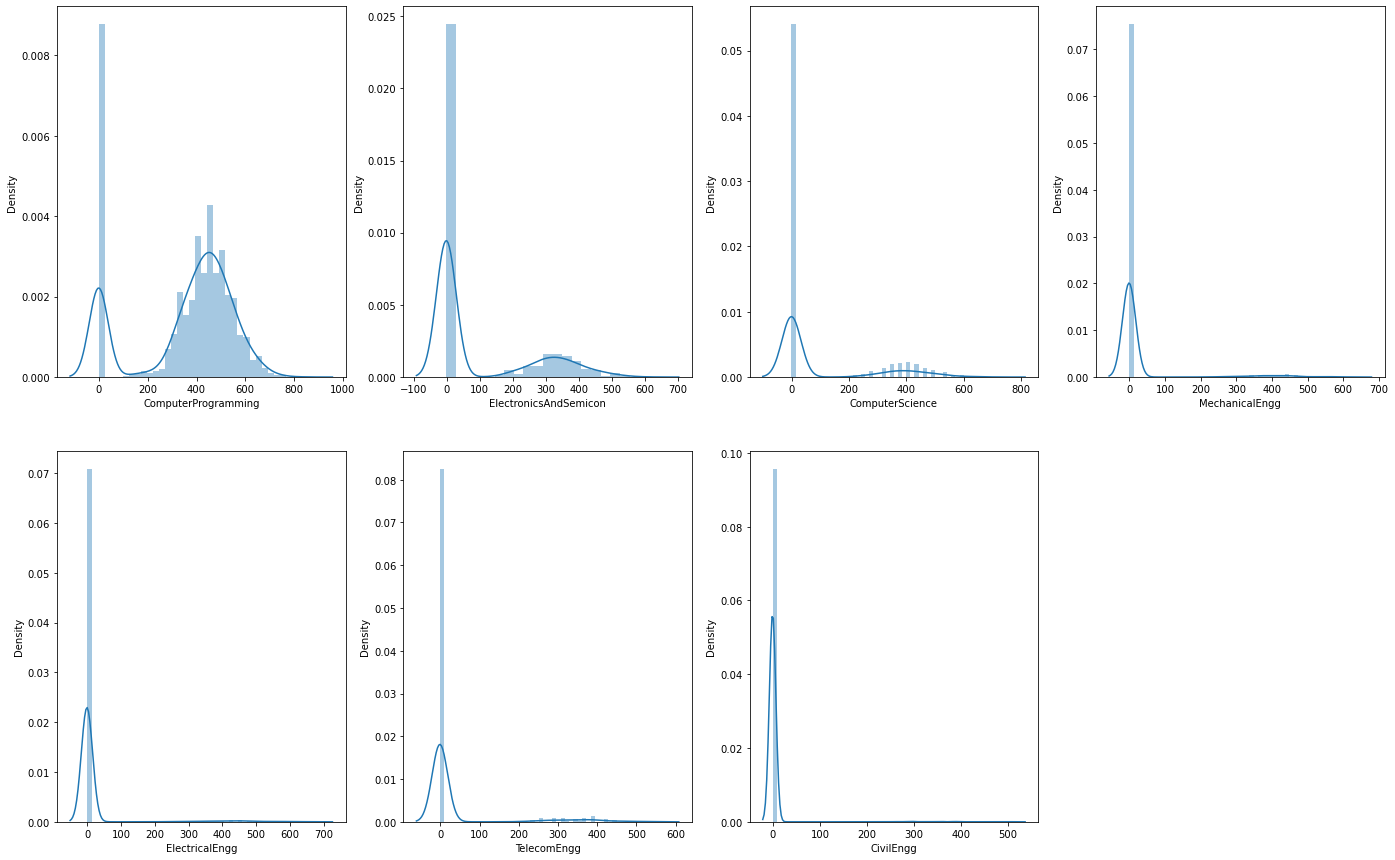

In [24]:
plt.figure(figsize=(30,15))
plt.subplot(251)
sns.distplot(df['ComputerProgramming'])
plt.subplot(252)
sns.distplot(df['ElectronicsAndSemicon'])
plt.subplot(253)
sns.distplot(df['ComputerScience'])
plt.subplot(254)
sns.distplot(df['MechanicalEngg'])
plt.subplot(256)
sns.distplot(df['ElectricalEngg'])
plt.subplot(257)
sns.distplot(df['TelecomEngg'])
plt.subplot(258)
sns.distplot(df['CivilEngg'])
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

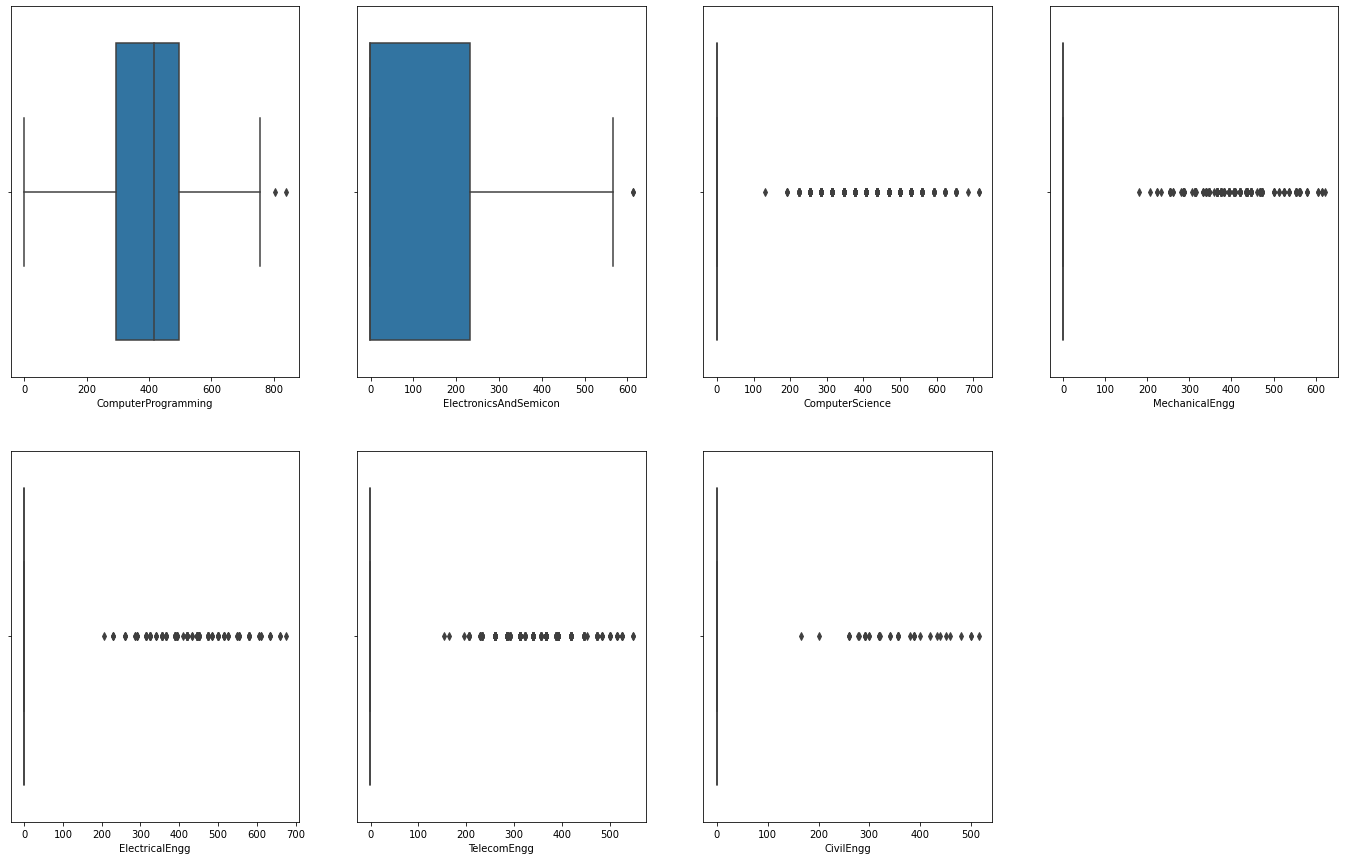

In [25]:
plt.figure(figsize=(30,15))
plt.subplot(251)
sns.boxplot(df['ComputerProgramming'])
plt.subplot(252)
sns.boxplot(df['ElectronicsAndSemicon'])
plt.subplot(253)
sns.boxplot(df['ComputerScience'])
plt.subplot(254)
sns.boxplot(df['MechanicalEngg'])
plt.subplot(256)
sns.boxplot(df['ElectricalEngg'])
plt.subplot(257)
sns.boxplot(df['TelecomEngg'])
plt.subplot(258)
sns.boxplot(df['CivilEngg'])
plt.show()

Distribution of AMCAT scores of Hard skills

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

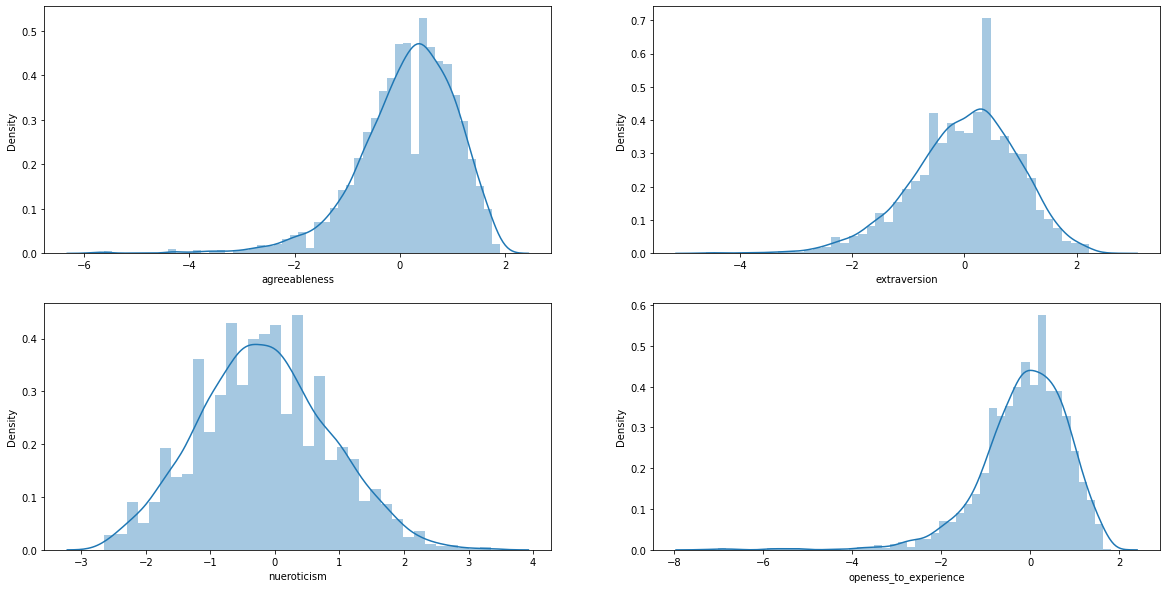

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.distplot(df['agreeableness'])
plt.subplot(222)
sns.distplot(df['extraversion'])
plt.subplot(223)
sns.distplot(df['nueroticism'])
plt.subplot(224)
sns.distplot(df['openess_to_experience'])
plt.show()

Distributions of AMCAT score of personality skills

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

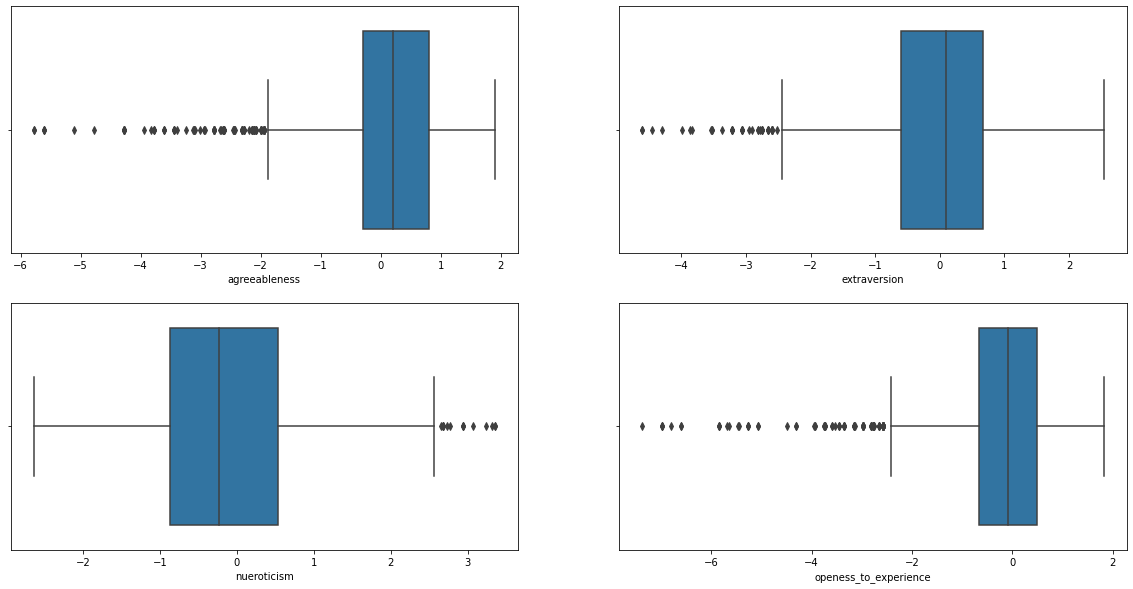

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.boxplot(df['agreeableness'])
plt.subplot(222)
sns.boxplot(df['extraversion'])
plt.subplot(223)
sns.boxplot(df['nueroticism'])
plt.subplot(224)
sns.boxplot(df['openess_to_experience'])
plt.show()

<AxesSubplot:ylabel='GraduationYear'>

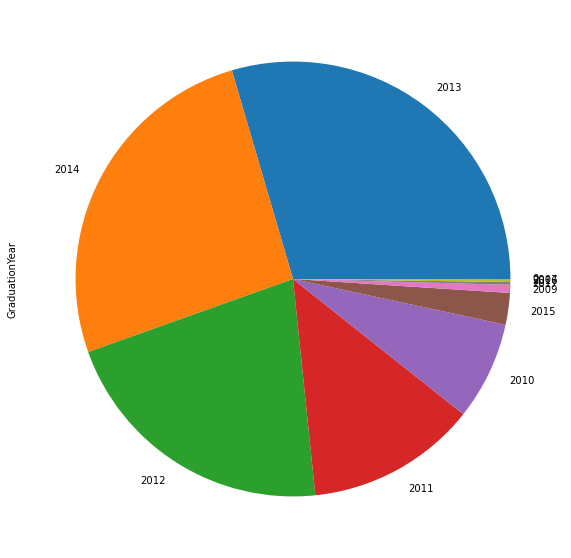

In [28]:
gy = df['GraduationYear'].value_counts()
gy.plot(kind="pie", figsize=(20,10))

## Observations from Univariate Analysis
* There are more Male employees than Female employees
* Most of the employees are from Tier 2 college
* Most of the employees are B.E/B.Tech graduates
* Maximum employees are from Uttar Pradesh
* Very few employees have salary > 1000000
* Most of the employees have College GPA between 60-80
* 10Percentage column is right skewed
* 12Percentage is normally distributed
* AMCAT scores of soft skills are normally distributed
* AMCAT scores of hard skills are log normally distributed
* AMCAT scores of personality test are right skewed
* Most of the employees are graduated between 2010 and 2014

## Bivariate Analysis

<ipython-input-29-0b0d8114aabe>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(labels=df['Salary'],rotation=30)


[Text(-500000.0, 0, '420000'),
 Text(0.0, 0, '500000'),
 Text(500000.0, 0, '325000'),
 Text(1000000.0, 0, '1100000'),
 Text(1500000.0, 0, '200000'),
 Text(2000000.0, 0, '300000'),
 Text(2500000.0, 0, '300000'),
 Text(3000000.0, 0, '400000'),
 Text(3500000.0, 0, '600000'),
 Text(4000000.0, 0, '230000'),
 Text(4500000.0, 0, '600000')]

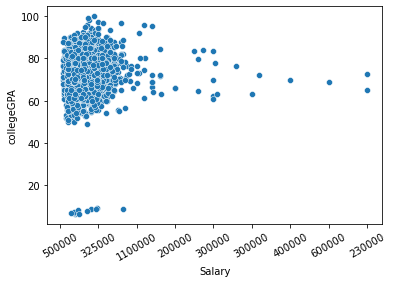

In [29]:
p=sns.scatterplot(x=df['Salary'], y=df['collegeGPA'])
p.set_xticklabels(labels=df['Salary'],rotation=30)

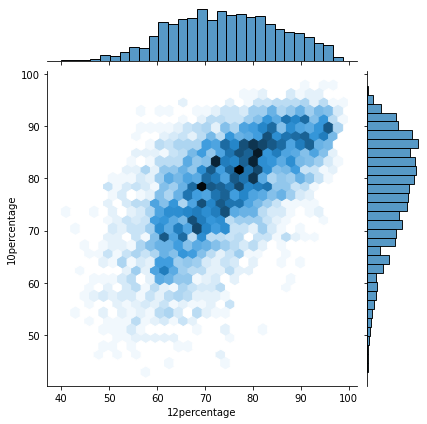

In [30]:
sns.jointplot(x=df['12percentage'],y=df['10percentage'],kind='hex',data=df)

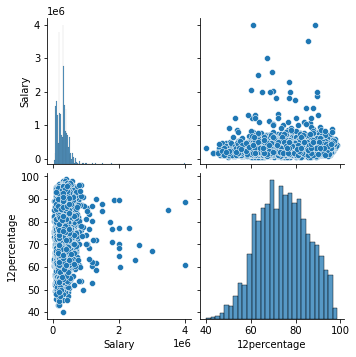

In [31]:
sns.pairplot(df,vars=['Salary','12percentage'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

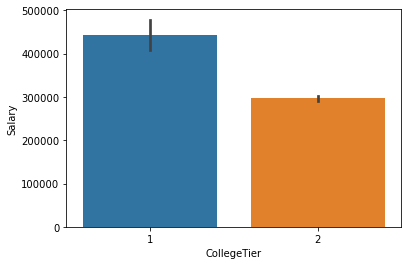

In [32]:
sns.barplot(df['CollegeTier'],df['Salary'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\an

ValueError: The number of FixedLocator locations (46), usually from a call to set_ticks, does not match the number of ticklabels (3998).

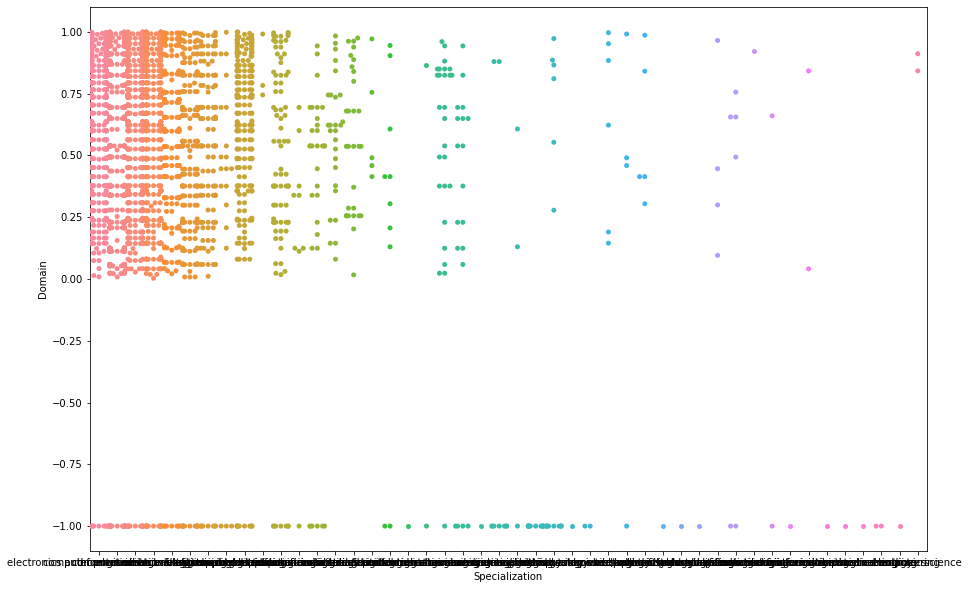

In [33]:
plt.figure(figsize=(15,10))
sd=sns.swarmplot(df['Specialization'],df['Domain'])
sd.set_xticklabels(df['Specialization'],rotation=90)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Salary'>

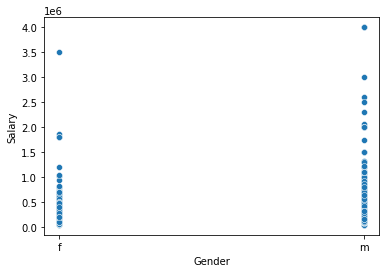

In [34]:
sns.scatterplot(df['Gender'],df['Salary'])

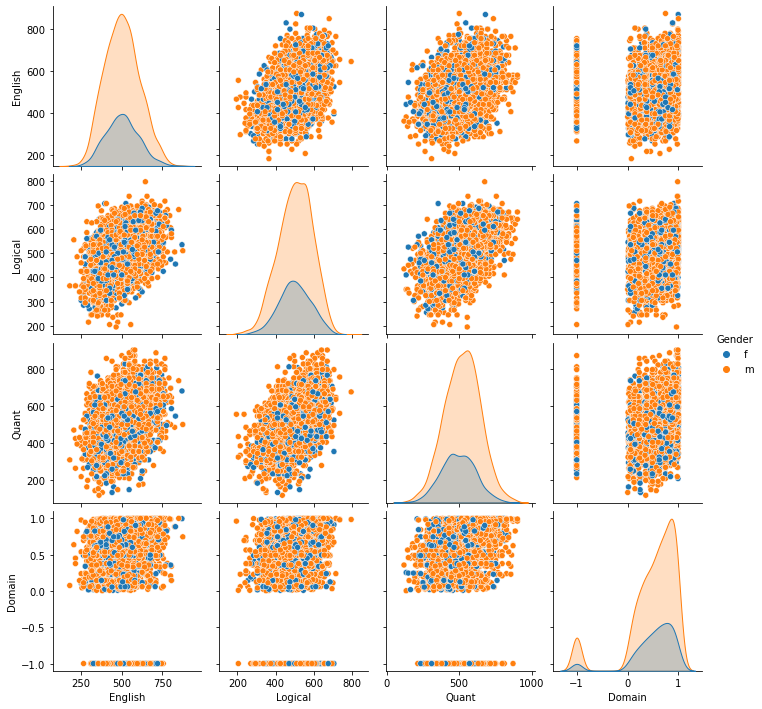

In [35]:
cols=df.columns[22:26].tolist() + ['Gender']
sns.pairplot(df[cols], hue ="Gender")

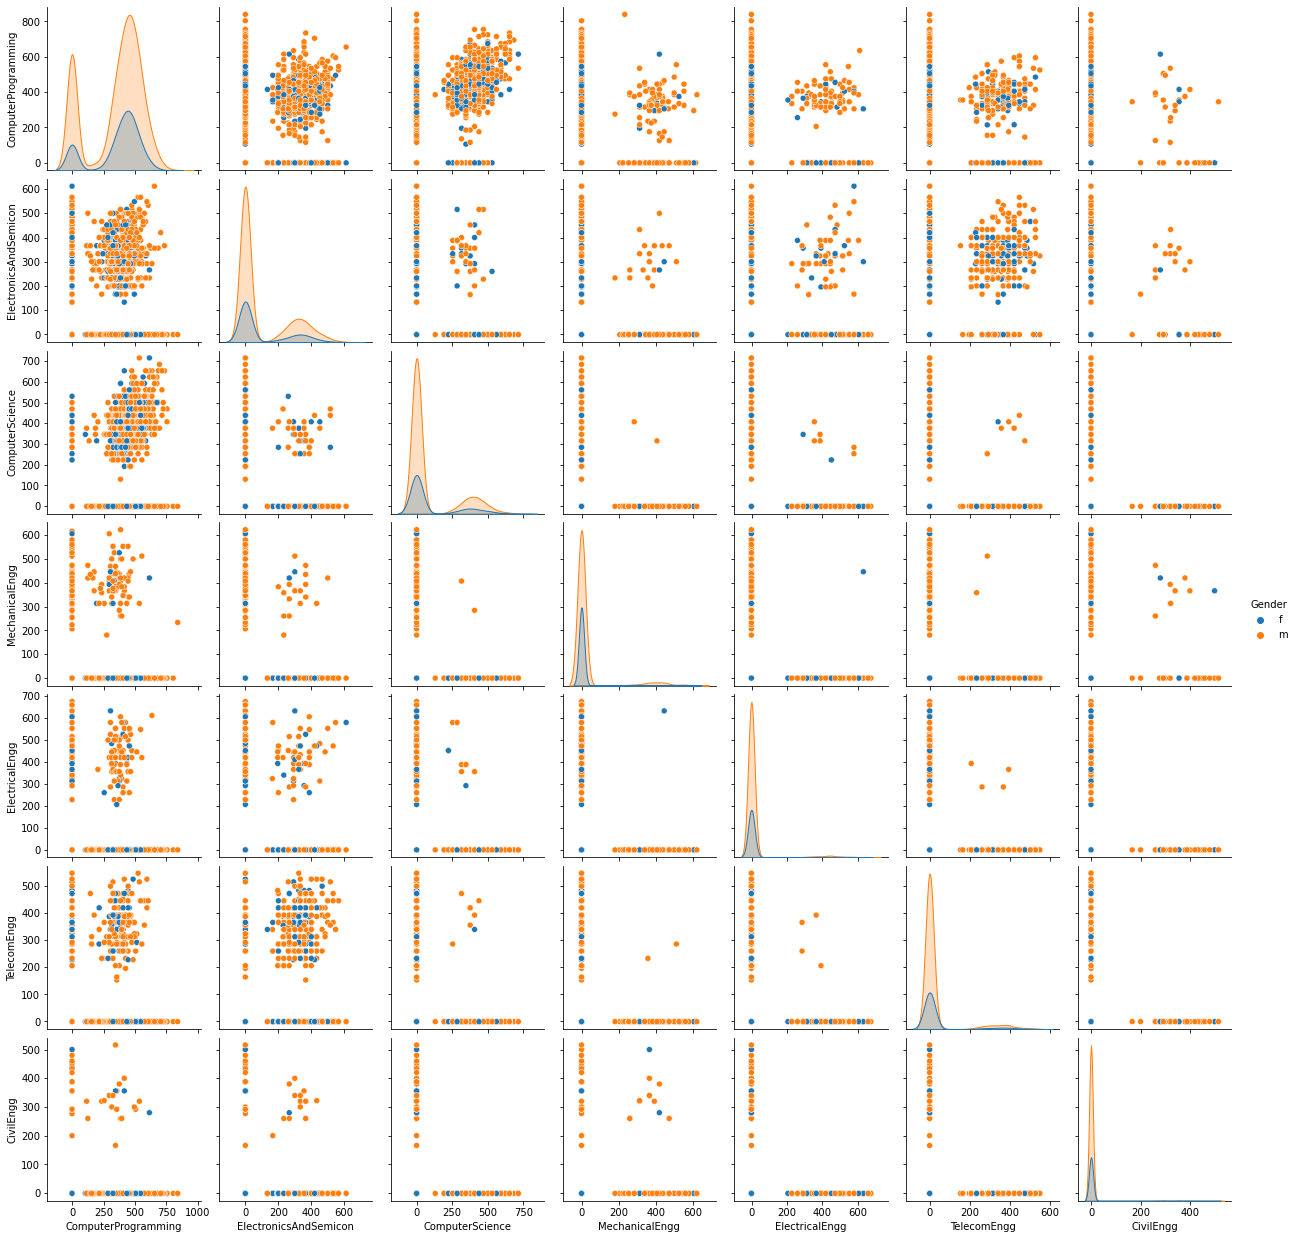

In [36]:
cols3=df.columns[26:33].tolist() + ['Gender']
sns.pairplot(df[cols3], hue ="Gender")

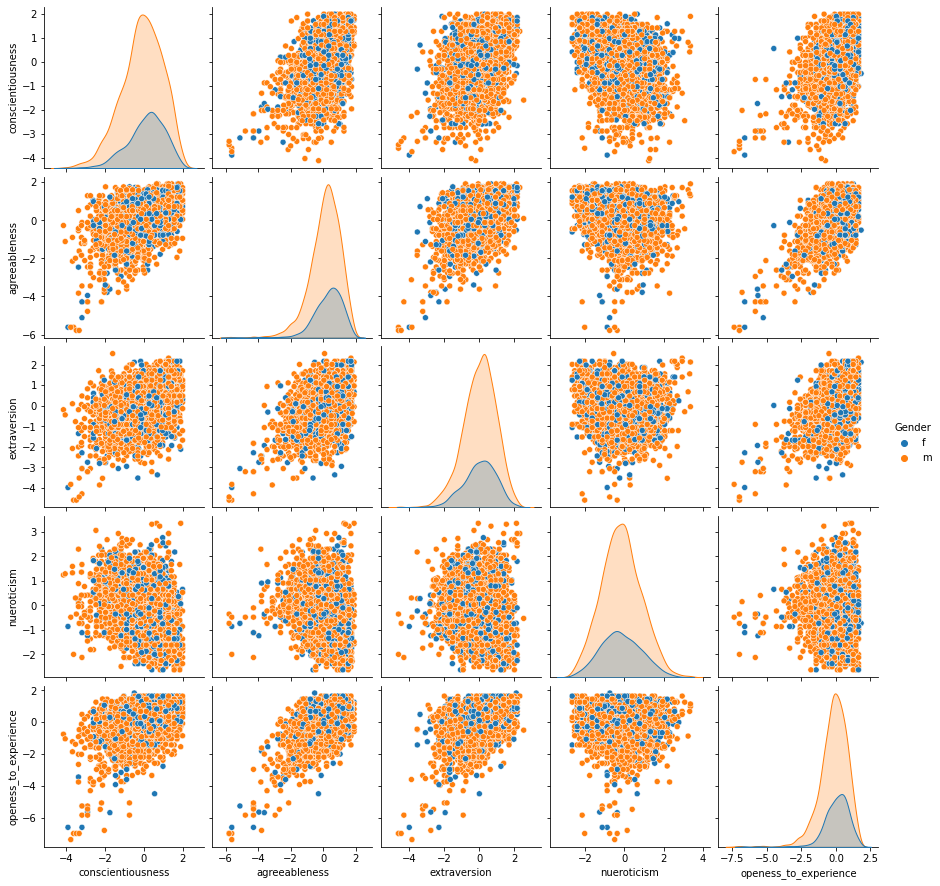

In [37]:
cols2=df.columns[33:38].tolist() + ['Gender']
sns.pairplot(df[cols2], hue ="Gender")

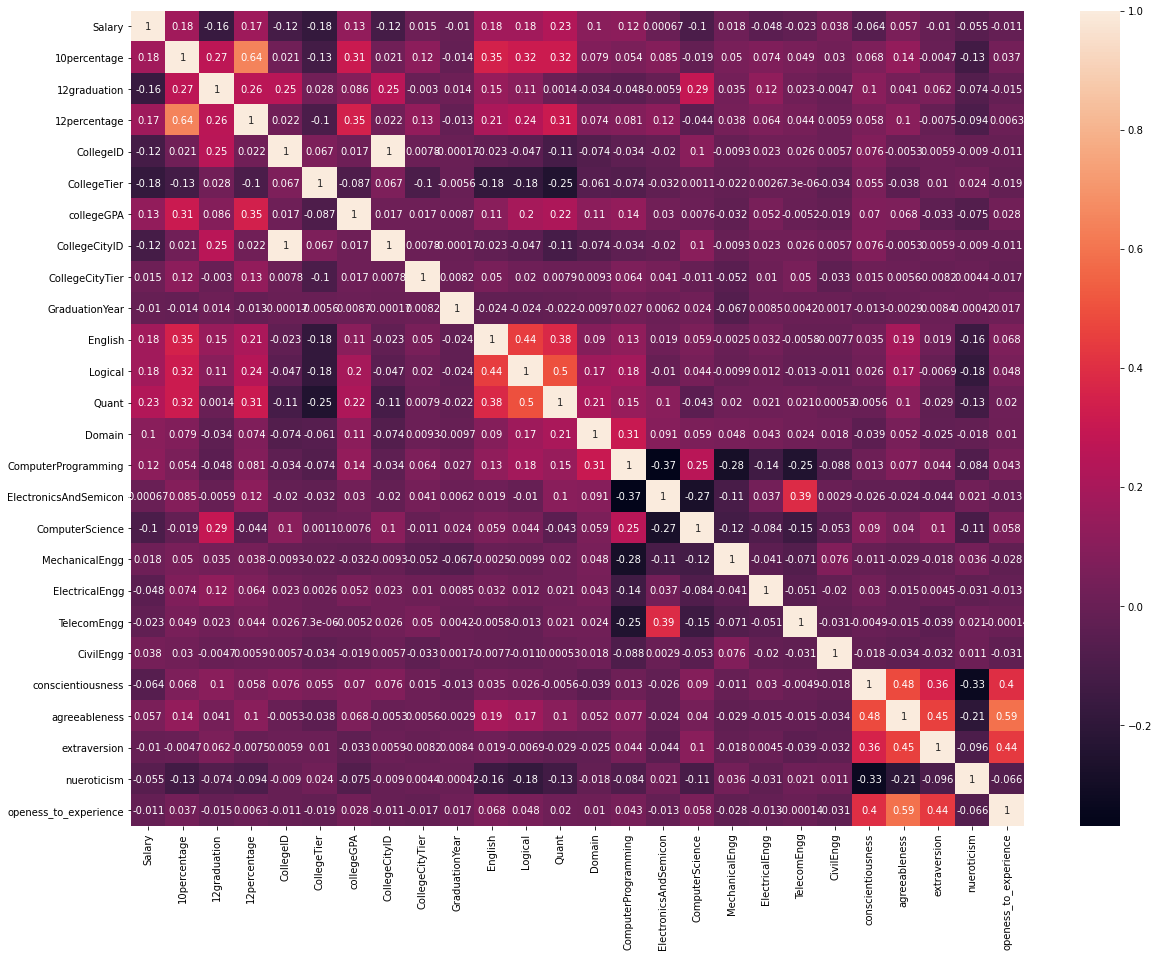

In [38]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Observations from bivariate analysis
* Salary does not depend on GPA, 10th percentage and 12th percentage
* 12th percentage depends on 10th percentage
* Employees from Tier 1 college have more salary compared to Tier 2
* Salary does not depend on Gender
* College GPA does not depend on College Tier
* GraduationYear has no relation with any other column except DOJ and DOL
* College ID and College City ID are completely correlated so drop one of them
* Female employees have better soft skills than male employees
* Male employees have better soft skills than female employees

## Research Questions
* Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
* Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

### Test of claim by Times of India article 

In [39]:
job_role =['programmer analyst','software engineer','hardware engineer','associate engineer']
df_cs = df[df['Specialization'] =='computer science & engineering']

In [40]:
df1 = df_cs[df_cs['Designation'].isin(job_role).values]
df1.head()

Unnamed: 0  Salary        DOJ                  DOL         Designation  \
24      train  335000 2014-06-01  2015-06-01 00:00:00  programmer analyst   
31      train  340000 2014-08-01  2015-04-01 00:00:00   software engineer   
48      train  390000 2013-09-01              present   software engineer   
52      train  400000 2015-04-01              present   software engineer   
55      train  250000 2014-08-01              present   software engineer   

        JobCity Gender        DOB  10percentage      10board  ...  \
24    Hyderabad      m 1993-06-28          88.0  state board  ...   
31    Bangalore      m 1992-10-23          77.2  state board  ...   
48    Bangalore      m 1991-02-28          86.6         cbse  ...   
52  Navi Mumbai      m 1992-03-09          85.2         icse  ...   
55    Mangalore      m 1992-02-13          90.8  state board  ...   

    ComputerScience  MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
24              346              -1             -1           -1         -1   
31              407              -1             -1           -1         -1   
48              346              -1             -1           -1         -1   
52               -1              -1             -1           -1         -1   
55              376              -1             -1           -1         -1   

   conscientiousness agreeableness  extraversion  nueroticism  \
24            0.4155        0.8027        0.1357     -0.99500   
31           -0.0154        1.2114        1.0859     -1.50210   
48           -2.5039        0.0328        0.3817      0.26793   
52            1.1336        0.3789        1.0859      0.65300   
55           -0.3027        0.7119       -0.2974      1.16010   

    openess_to_experience  
24                -0.6692  
31                 0.2889  
48                 0.5024  
52                 0.2889  
55                -0.4776  

[5 rows x 38 columns]

In [41]:
population_mean= df_cs['Salary'].mean()
population_std = df_cs['Salary'].std()

In [42]:
df_cs_sample = df_cs.head(30)
sample_mean = df_cs_sample.Salary.mean()
sample_size = 30

In [43]:
def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [44]:
Zscore = z_score(sample_size, sample_mean, population_mean, population_std)

In [45]:
z1 = (250000-population_mean)/population_std
z2 = (300000-population_mean)/population_std

In [46]:
if Zscore < z2 and Zscore > z1:
    print('We failed to reject null hypothesis')
else:
    print('We reject null hypothesis')

We reject null hypothesis


So the claim of the article by Times of India is not correct

### Check relationship between Gender and Specialization

In [47]:
pd.crosstab(index=df['Specialization'],columns=df['Gender'])

Gender                                         f    m
Specialization                                       
aeronautical engineering                       1    2
applied electronics and instrumentation        2    7
automobile/automotive engineering              0    5
biomedical engineering                         2    0
biotechnology                                  9    6
ceramic engineering                            0    1
chemical engineering                           1    8
civil engineering                              6   23
computer and communication engineering         0    1
computer application                          59  185
computer engineering                         175  425
computer networking                            0    1
computer science                               1    1
computer science & engineering               183  561
computer science and technology                2    4
control and instrumentation engineering        0    1
electrical and power engineering               0    2
electrical engineering                        17   65
electronics                                    0    1
electronics & instrumentation eng             10   22
electronics & telecommunications              28   93
electronics and communication engineering    212  668
electronics and computer engineering           0    3
electronics and electrical engineering        34  162
electronics and instrumentation engineering    5   22
electronics engineering                        3   16
embedded systems technology                    0    1
industrial & management engineering            0    1
industrial & production engineering            2    8
industrial engineering                         1    1
information & communication technology         2    0
information science                            0    1
information science engineering                8   19
information technology                       173  487
instrumentation and control engineering        9   11
instrumentation engineering                    0    4
internal combustion engine                     0    1
mechanical & production engineering            0    1
mechanical and automation                      0    5
mechanical engineering                        10  191
mechatronics                                   1    3
metallurgical engineering                      0    2
other                                          0   13
polymer technology                             0    1
power systems and automation                   0    1
telecommunication engineering                  1    5

In [48]:
ct=pd.crosstab(df['Specialization'],df['Gender'])
chi2_contingency(ct)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [49]:
chi2_test_stat = chi2_contingency(ct)[0]
pval = chi2_contingency(ct)[1]
df2 = chi2_contingency(ct)[2]

In [50]:
confidence_level =0.90
alpha = 1 - confidence_level
chi2_critical = chi2.ppf(1-alpha,df2)
chi2_critical

57.50530474499599

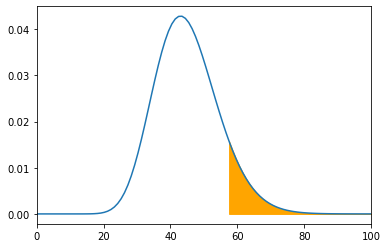

In [51]:
#Plotting the chi2 distribution
x_min = 0
x_max = 100

#plotting the graph and setting the limits
x = np.linspace(x_min,x_max,100)
y = chi2.pdf(x,df2)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Setting chi critical value
chi_critical_right = chi2_critical

#Shading the rejection region
x1 = np.linspace(chi_critical_right,x_max,100)
y1 = chi2.pdf(x1,df2)
plt.fill_between(x1,y1,color='orange')

In [52]:
#conclusion with chi^2 test
if(chi2_test_stat>chi2_critical):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Reject null hypothesis


In [53]:
#Conclusion with p-test
if (pval<alpha):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Reject null hypothesis


So the preference of Specialisation depends on the Gender.

## Conclusion
* Male employees have higher chances of employment than Female employees
* Tier 1 college candidates are more likely to get a higher salary than tier 2 college candidate
* B.E/B.Tech graduates are more likely to get the employment
* The preference of Specialisation depends on the Gender
* Salary of candidate do not depend on Gender
* Salary does not depend on GPA, 10th percentage and 12th percentage